In [67]:
# import tensorflow as tf
# from tensorflow import keras
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import data
# from PIL import Image

# Real Imports
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from datetime import datetime

PATH = os.path.join(os.path.dirname('/home/greco/Documents/Memev2/ALLDATA'), 'ALLDATA')

# parse through the folder through every file

# path = '/home/greco/Documents/Memev2/SpongebobImmaHeadOut'

train_sb_dir = '/home/greco/Documents/Memev2/ZTrainSpongebob'
train_cmm_dir = '/home/greco/Documents/Memev2/ZTrainChangeMyMind'

validation_sb_dir = '/home/greco/Documents/Memev2/ZValidateSpongebob'
validation_cmm_dir = '/home/greco/Documents/Memev2/ZValidateChangeMyMind'
    

In [42]:
# Spongebob Train resize
for image_file_name in os.listdir('/home/greco/Documents/Memev2/ZTrainSpongebob/'):
    if image_file_name.endswith(".jpeg"):
        now = datetime.now().strftime('%Y%m%d-%H%M%S-%f')

        im = Image.open('/home/greco/Documents/Memev2/ZTrainSpongebob/'+image_file_name)
        new_width  = 150
        new_height = 150
        im = im.resize((new_width, new_height), Image.ANTIALIAS)
        im.save('/home/greco/Documents/Memev2/ZZTrainSpongebobResize/' + now + '.jpeg')

In [33]:
# Change My Mind Train resize
for image_file_name in os.listdir('/home/greco/Documents/Memev2/ZTrainChangeMyMind/'):
    if image_file_name.endswith(".jpeg"):
        now = datetime.now().strftime('%Y%m%d-%H%M%S-%f')

        im = Image.open('/home/greco/Documents/Memev2/ZTrainChangeMyMind/'+image_file_name)
        new_width  = 150
        new_height = 150
        im = im.resize((new_width, new_height), Image.ANTIALIAS)
        im.save('/home/greco/Documents/Memev2/ZZTrainChangeMyMindResize/' + now + '.jpeg')

In [35]:
# Spongebob Validate resize
for image_file_name in os.listdir('/home/greco/Documents/Memev2/ZValidateSpongebob/'):
    if image_file_name.endswith(".jpeg"):
        now = datetime.now().strftime('%Y%m%d-%H%M%S-%f')

        im = Image.open('/home/greco/Documents/Memev2/ZValidateSpongebob/'+image_file_name)
        new_width  = 150
        new_height = 150
        im = im.resize((new_width, new_height), Image.ANTIALIAS)
        im.save('/home/greco/Documents/Memev2/ZzValidateSpongebobResize/' + now + '.jpeg')

In [36]:
# Change My mind validate resize
for image_file_name in os.listdir('/home/greco/Documents/Memev2/ZValidateChangeMyMind/'):
    if image_file_name.endswith(".jpeg"):
        now = datetime.now().strftime('%Y%m%d-%H%M%S-%f')

        im = Image.open('/home/greco/Documents/Memev2/ZValidateChangeMyMind/'+image_file_name)
        new_width  = 150
        new_height = 150
        im = im.resize((new_width, new_height), Image.ANTIALIAS)
        im.save('/home/greco/Documents/Memev2/ZzValidateChangeMyMindResize/' + now + '.jpeg')

In [65]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

print(path_to_zip)

68608000/68606236 [==============================] - 4s 0us/step
/home/greco/.keras/datasets/cats_and_dogs.zip


In [66]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

print(PATH)

/home/greco/.keras/datasets/cats_and_dogs_filtered


In [68]:
# train_sb_dir = '/home/greco/Documents/Memev2/ZZTrainSpongebobResize'
# train_cmm_dir = '/home/greco/Documents/Memev2/ZZTrainChangeMyMindResize'

# validation_sb_dir = '/home/greco/Documents/Memev2/ZzValidateSpongebobResize'
# validation_cmm_dir = '/home/greco/Documents/Memev2/ZzValidateChangeMyMindResize'

train_dir = os.path.join(PATH, 'ZZFullTrain')
validation_dir = os.path.join(PATH, 'ZZFullValidate')

train_sb_dir = os.path.join(train_dir, 'ZZTrainSpongebobResize')  # directory with our training cat pictures
train_cmm_dir = os.path.join(train_dir, 'ZZTrainChangeMyMindResize')  # directory with our training dog pictures
validation_sb_dir = os.path.join(validation_dir, 'ZzValidateSpongebobResize')  # directory with our validation cat pictures
validation_cmm_dir = os.path.join(validation_dir, 'ZzValidateChangeMyMindResize')  # directory with our validation dog pictures


# train_sb_dir = '/home/greco/Documents/Memev2/ZZTrainSpongebobResize'
# train_cmm_dir = '/home/greco/Documents/Memev2/ZZTrainChangeMyMindResize'

# validation_sb_dir = '/home/greco/Documents/Memev2/ZzValidateSpongebobResize'
# validation_cmm_dir = '/home/greco/Documents/Memev2/ZzValidateChangeMyMindResize'

num_sb_tr = len(os.listdir(train_sb_dir))
num_cmm_tr = len(os.listdir(train_cmm_dir))

num_sb_val = len(os.listdir(validation_sb_dir))
num_cmm_val = len(os.listdir(validation_cmm_dir))

total_train = num_sb_tr + num_cmm_tr
total_val = num_sb_val + num_cmm_val

In [69]:
print("SB training set: ", num_sb_tr)
print("CMM training set: ", num_cmm_tr)

print("SB validation set: ", num_sb_val)
print("CMM validation set: ", num_cmm_val)

SB training set:  1100
CMM training set:  1100
SB validation set:  302
CMM validation set:  302


In [70]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [71]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [73]:
train_dir = '/home/greco/Documents/Memev2/ALLDATA/ZZFullTrain/'

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2200 images belonging to 2 classes.


In [74]:
validation_dir = '/home/greco/Documents/Memev2/ALLDATA/ZZFullValidate/'
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 604 images belonging to 2 classes.


In [75]:
sample_training_images, _ = next(train_data_gen)

In [76]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

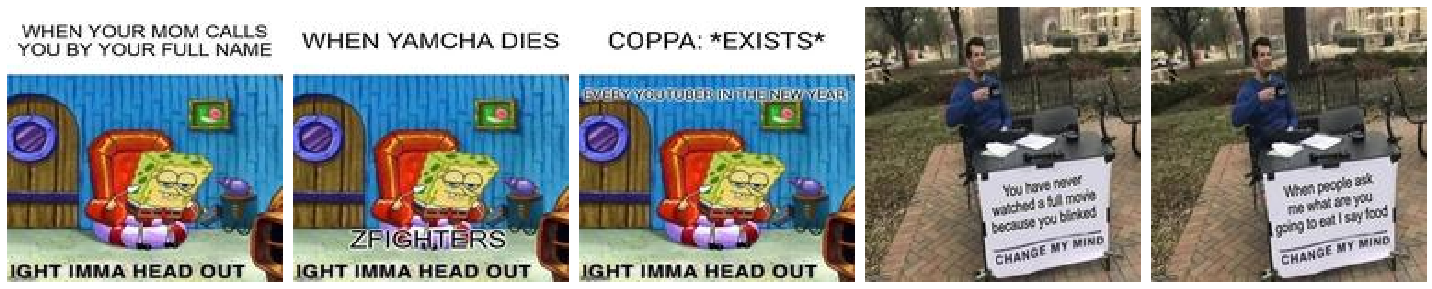

In [77]:
plotImages(sample_training_images[:5])

In [78]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [81]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 4 steps
Epoch 1/15
17/17 [==============================] - 37s 2s/step - loss: 0.1148 - accuracy: 0.9387 - val_loss: 0.0167 - val_accuracy: 0.9980
Epoch 2/15
17/17 [==============================] - 35s 2s/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 2.0896e-04 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 35s 2s/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.0187 - val_accuracy: 0.9980
Epoch 4/15
17/17 [==============================] - 35s 2s/step - loss: 7.8742e-05 - accuracy: 1.0000 - val_loss: 1.6274e-06 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 36s 2s/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0068 - val_accuracy: 0.9980
Epoch 6/15
17/17 [==============================] - 36s 2s/step - loss: 2.4042e-06 - accuracy: 1.0000 - val_loss: 0.0113 

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 4 steps
Epoch 1/15
17/17 [==============================] - 32s 2s/step - loss: 1.1028e-06 - accuracy: 1.0000 - val_loss: 2.7493e-06 - val_accuracy: 1.0000
Epoch 2/15
17/17 [==============================] - 23s 1s/step - loss: 9.8878e-07 - accuracy: 1.0000 - val_loss: 2.8769e-06 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 23s 1s/step - loss: 9.1629e-07 - accuracy: 1.0000 - val_loss: 2.8969e-06 - val_accuracy: 1.0000
Epoch 4/15
17/17 [==============================] - 23s 1s/step - loss: 8.4608e-07 - accuracy: 1.0000 - val_loss: 2.9441e-06 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 23s 1s/step - loss: 7.6096e-07 - accuracy: 1.0000 - val_loss: 3.0071e-06 - val_accuracy: 1.0000
Epoch 6/15
17/17 [==============================] - 25s 1s/step - loss: 6.3117e-07 - accuracy: 1.0000 - val_loss: 3.1063e-06 - val_accuracy: 1.0000
Epoch 7/15
17/17 [===

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()